In [1]:
import numpy as np 
from scipy.io import loadmat
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from displayData import *
from nnCostFunction import *
from sigmoidGradient import *
from randInitializeWeights import *
from checkNNGradients import *
from predict import *

In [2]:
data=loadmat('digits.mat')
X=data['X']
y=data['y']
m=X.shape[0]
input_layer_size=400
hidden_layer_size=25
num_labels=10

# Visualize data

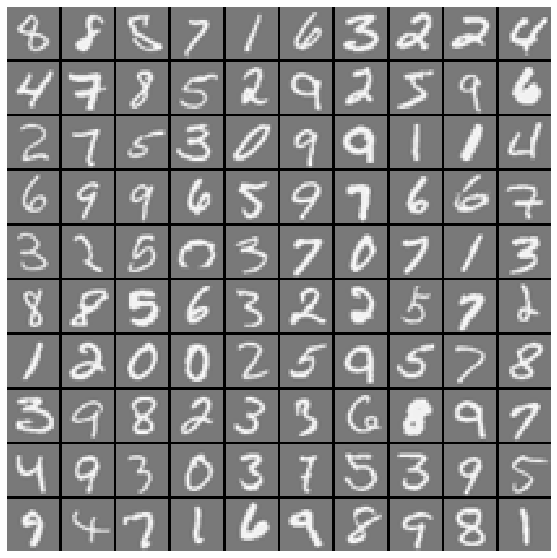

In [3]:
# Randomly select 100 data points to display
rand_indices=np.random.randint(m,size=100)
sel=X[rand_indices,:]
displayData(sel,20,20)

# Forward propagation

## Cost function

In [4]:
weights=loadmat('weights.mat')
theta1,theta2=weights['Theta1'],weights['Theta2']
# Unroll parameters
nn_params=np.append(np.ravel(theta1),np.ravel(theta2))
# Weight regularization parameter (we set this to 0 here).
Lambda=0
J,_=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print('Cost at parameters (loaded from weights): %f (this value should be about 0.287629)'%J)

Cost at parameters (loaded from weights): 0.287629 (this value should be about 0.287629)


## Regularization

In [5]:
# Weight regularization parameter (we set this to 1 here).
Lambda=1
J,_=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print('Cost at parameters (loaded from weights): %f (this value should be about 0.383770)'%J)

Cost at parameters (loaded from weights): 0.383770 (this value should be about 0.383770)


## Gradient of activation function

In [6]:
g=sigmoidGradient(np.array([-1,-0.5,0,0.5,1]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]: \n',g)

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]: 
 [0.19661193 0.23500371 0.25       0.23500371 0.19661193]


## Initialize parameters

In [7]:
initial_theta1=randInitializeWeights(input_layer_size,hidden_layer_size)
initial_theta2=randInitializeWeights(hidden_layer_size,num_labels)
# Unroll parameters
initial_nn_params=np.append(np.ravel(initial_theta1),np.ravel(initial_theta2))

# Backpropagation

## Gradient checking

In [8]:
# Check gradients by running checkNNGradients
checkNNGradients()

[[ 1.23162247e-02  1.23162247e-02]
 [ 1.73828183e-04  1.73828184e-04]
 [ 2.61455142e-04  2.61455144e-04]
 [ 1.08701450e-04  1.08701450e-04]
 [ 3.92471368e-03  3.92471369e-03]
 [ 1.90101253e-04  1.90101252e-04]
 [ 2.22272329e-04  2.22272331e-04]
 [ 5.00872566e-05  5.00872547e-05]
 [-8.08459407e-03 -8.08459407e-03]
 [ 3.13170578e-05  3.13170587e-05]
 [-2.17840324e-05 -2.17840341e-05]
 [-5.48569856e-05 -5.48569864e-05]
 [-1.26669105e-02 -1.26669105e-02]
 [-1.56130211e-04 -1.56130210e-04]
 [-2.45506162e-04 -2.45506163e-04]
 [-1.09164882e-04 -1.09164881e-04]
 [-5.59342546e-03 -5.59342547e-03]
 [-2.00036574e-04 -2.00036572e-04]
 [-2.43630220e-04 -2.43630220e-04]
 [-6.32313690e-05 -6.32313673e-05]
 [ 3.09347722e-01  3.09347722e-01]
 [ 1.61067138e-01  1.61067138e-01]
 [ 1.47036522e-01  1.47036522e-01]
 [ 1.58268577e-01  1.58268577e-01]
 [ 1.57616707e-01  1.57616707e-01]
 [ 1.47236360e-01  1.47236360e-01]
 [ 1.08133003e-01  1.08133003e-01]
 [ 5.61633717e-02  5.61633717e-02]
 [ 5.19510542e-02  5

In [9]:
# Check gradients by running checkNNGradients
Lambda=3
checkNNGradients(Lambda)

[[ 0.01231622  0.01231622]
 [ 0.05473167  0.05473167]
 [ 0.00872866  0.00872866]
 [-0.04529945 -0.04529945]
 [ 0.00392471  0.00392471]
 [-0.01657483 -0.01657483]
 [ 0.03964147  0.03964147]
 [ 0.05941158  0.05941158]
 [-0.00808459 -0.00808459]
 [-0.03260995 -0.03260995]
 [-0.0600212  -0.0600212 ]
 [-0.03224923 -0.03224923]
 [-0.01266691 -0.01266691]
 [ 0.05928031  0.05928031]
 [ 0.03877176  0.03877176]
 [-0.01738336 -0.01738336]
 [-0.00559343 -0.00559343]
 [-0.04525927 -0.04525927]
 [ 0.008749    0.008749  ]
 [ 0.05471348  0.05471348]
 [ 0.30934772  0.30934772]
 [ 0.21562498  0.21562498]
 [ 0.15550372  0.15550372]
 [ 0.11286043  0.11286043]
 [ 0.10008125  0.10008125]
 [ 0.13047143  0.13047143]
 [ 0.108133    0.108133  ]
 [ 0.11552487  0.11552487]
 [ 0.07667816  0.07667816]
 [ 0.02209407  0.02209407]
 [-0.00469114 -0.00469114]
 [ 0.01958089  0.01958089]
 [ 0.10627037  0.10627037]
 [ 0.11519755  0.11519755]
 [ 0.08957408  0.08957408]
 [ 0.03660632  0.03660632]
 [-0.00294313 -0.00294313]
 

In [10]:
# Also output the costFunction debugging values
debug_J,_=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print('Cost at (fixed) debugging parameters (w/ lambda = %f): %f \n'
'(for lambda = 3, this value should be about 0.576051)'%(Lambda,debug_J))

Cost at (fixed) debugging parameters (w/ lambda = 3.000000): 0.576051 
(for lambda = 3, this value should be about 0.576051)


## Learning

In [11]:
Lambda=1
# Create "short hand" for the cost function to be minimized
def costFunction(p): return nnCostFunction(p,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
options={
    'maxiter':50
}
# Now, costFunction is a function that takes in only one argument (the neural network parameters)
res=optimize.minimize(costFunction,initial_nn_params,method='CG',jac=True,options=options)

In [12]:
final_nn_params=res.x
# Obtain Theta1 and Theta2 back from nn_params
final_theta1=final_nn_params[:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size,input_layer_size+1)
final_theta2=final_nn_params[hidden_layer_size*(input_layer_size+1):].reshape(num_labels,hidden_layer_size+1)
pred=predict(final_theta1,final_theta2,X)
print('Training Set Accuracy: %.2f'%(np.mean(pred[:,np.newaxis]==y)*100)+'%')

Training Set Accuracy: 95.92%


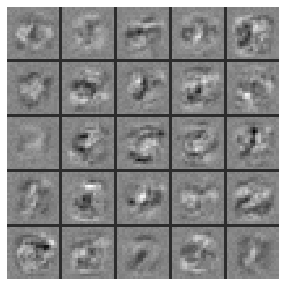

In [13]:
displayData(final_theta1[:,1:],20,20)

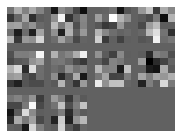

In [14]:
displayData(final_theta2[:,1:],5,5)

# Advanced optimization algorithms

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y.ravel(),test_size=0.5)
clf=MLPClassifier(hidden_layer_sizes=(25,),solver='adam',alpha=1,max_iter=50)
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
print('Training Set Accuracy: %.2f'%(clf.score(X_train,y_train)*100)+'%')
print('Test Set Accuracy: %.2f'%(clf.score(X_test,y_test)*100)+'%')

Training Set Accuracy: 94.64%
Test Set Accuracy: 90.52%


True class: 3  |  Predicted class: 3 | Probability of match: 99.8%


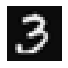

In [17]:
ri=np.random.randint(X_test.shape[0])
Xi=X_test[ri,:][np.newaxis,:]
displayData(Xi,20,20)
print('True class: %d  |  Predicted class: %d | Probability of match: %.1f'%(y_test[ri],clf.predict(Xi),np.max(clf.predict_proba(Xi))*100)+'%')